<ipython-input-1-87f5e90c8860>:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_nasa_train = pd.read_csv(nasa_train_path, delim_whitespace=True, header=None)
<ipython-input-1-87f5e90c8860>:22: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_nasa_test = pd.read_csv(nasa_test_path, delim_whitespace=True, header=None)


NASA Train Dataset Summary:
        unit_number  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
count  20631.000000    20631.000000  20631.000000  20631.000000       20631.0   
mean      51.506568      108.807862     -0.000009      0.000002         100.0   
std       29.227633       68.880990      0.002187      0.000293           0.0   
min        1.000000        1.000000     -0.008700     -0.000600         100.0   
25%       26.000000       52.000000     -0.001500     -0.000200         100.0   
50%       52.000000      104.000000      0.000000      0.000000         100.0   
75%       77.000000      156.000000      0.001500      0.000300         100.0   
max      100.000000      362.000000      0.008700      0.000600         100.0   

       sensor_measurement_1  sensor_measurement_2  sensor_measurement_3  \
count          2.063100e+04          20631.000000          20631.000000   
mean           5.186700e+02            642.680934           1590.523119   
std            6.

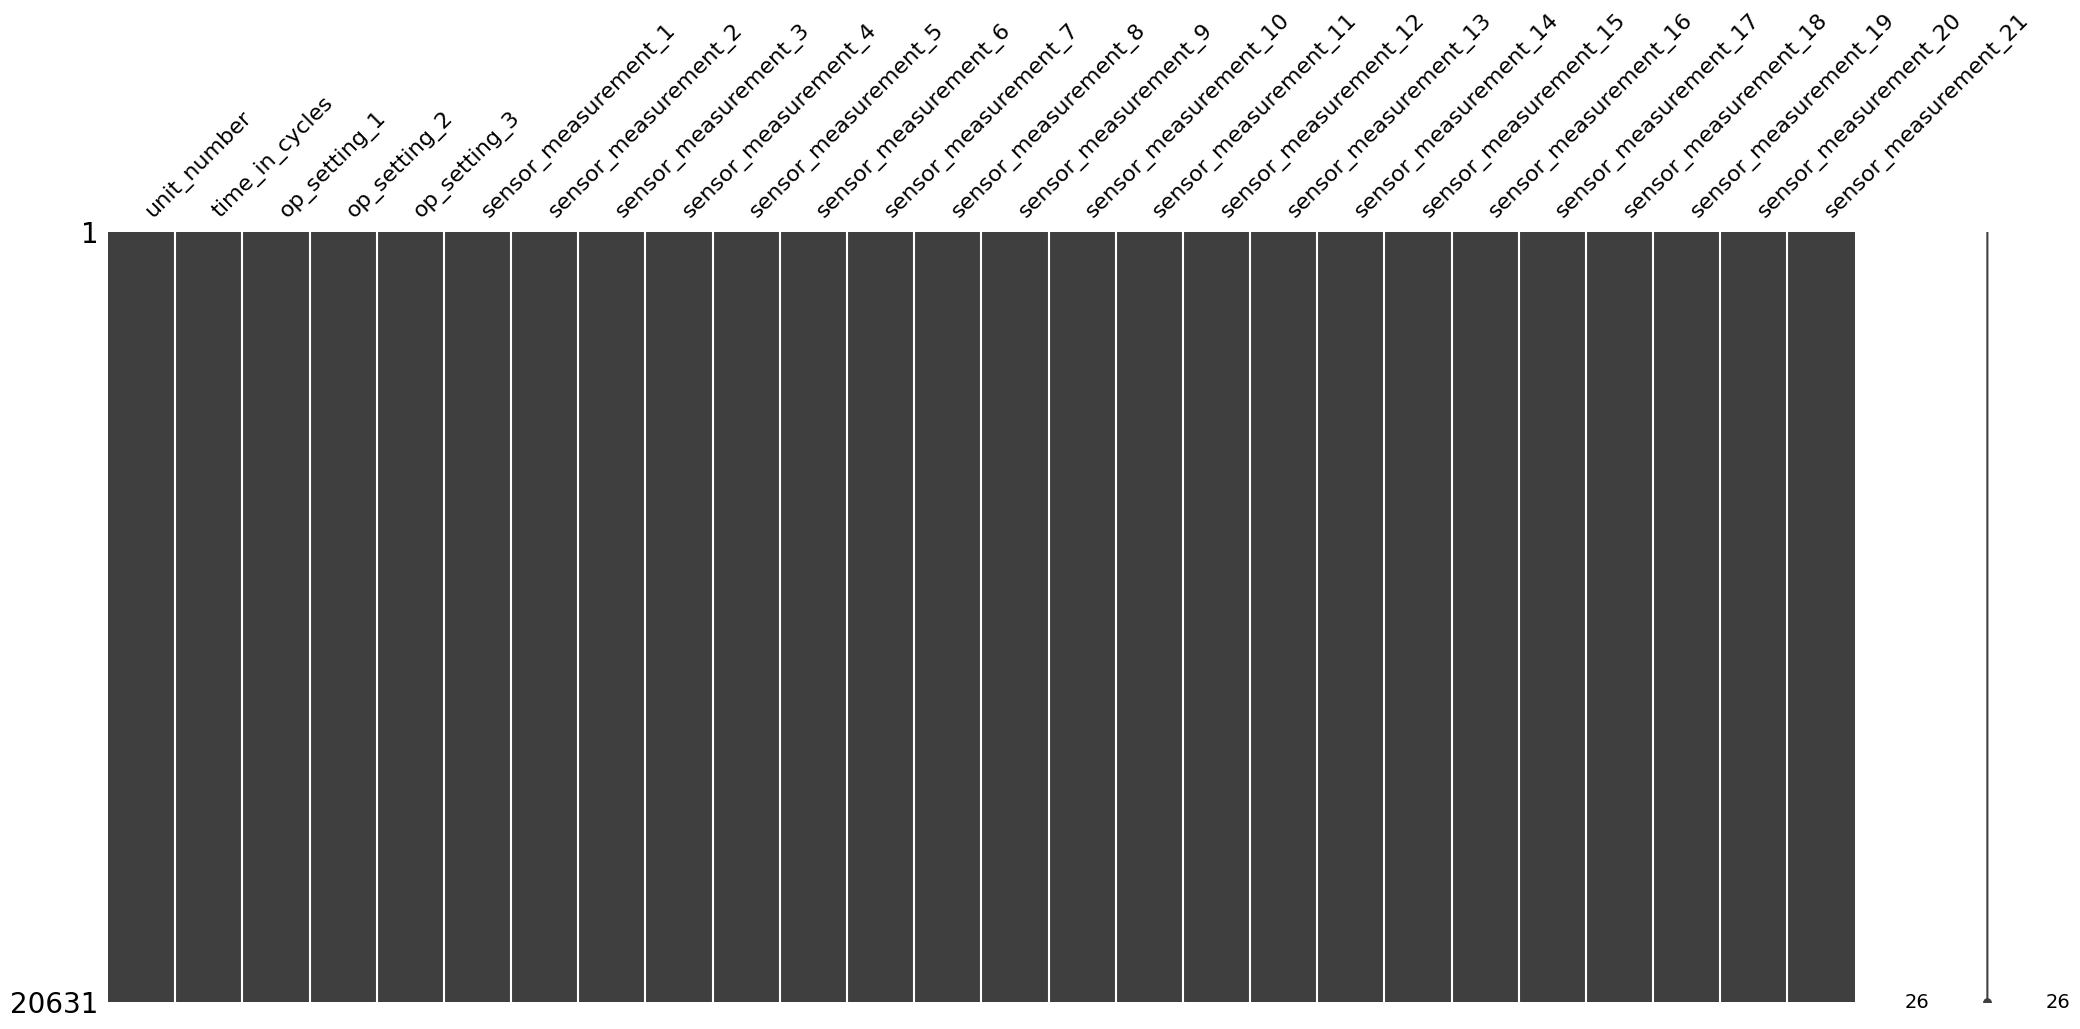

Distribution of Operational Settings:


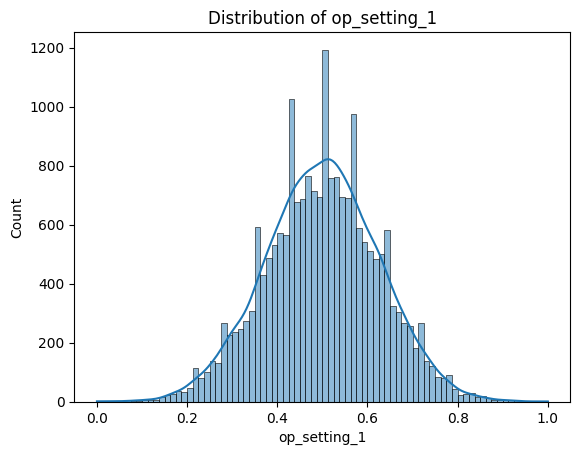

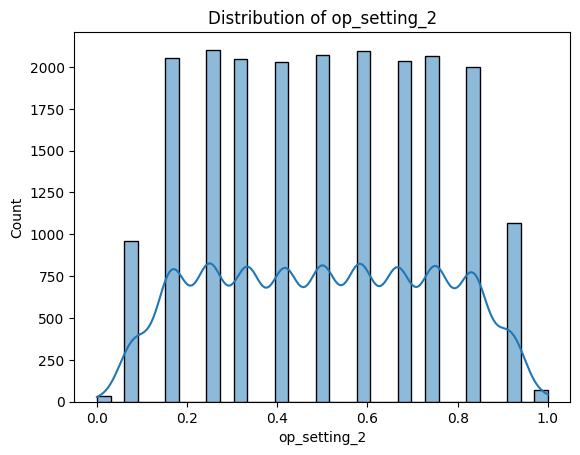

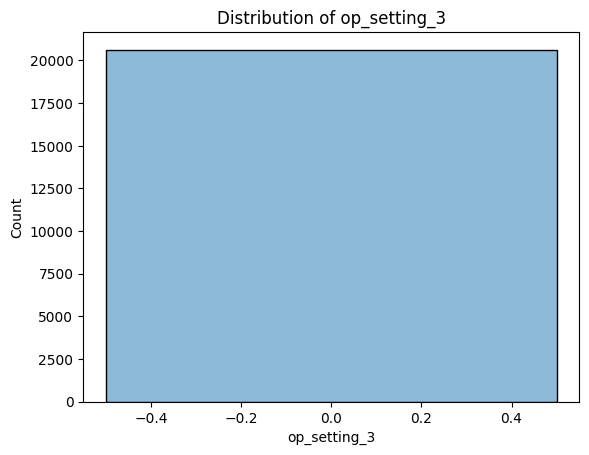

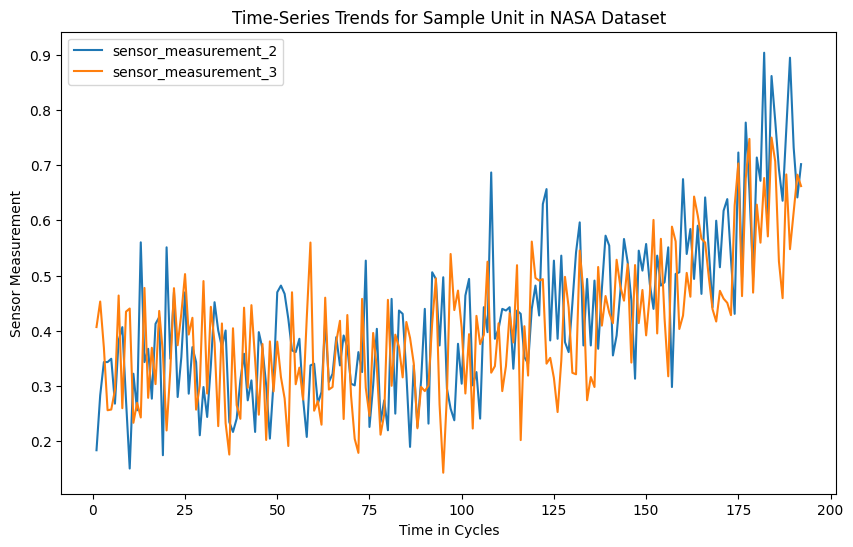

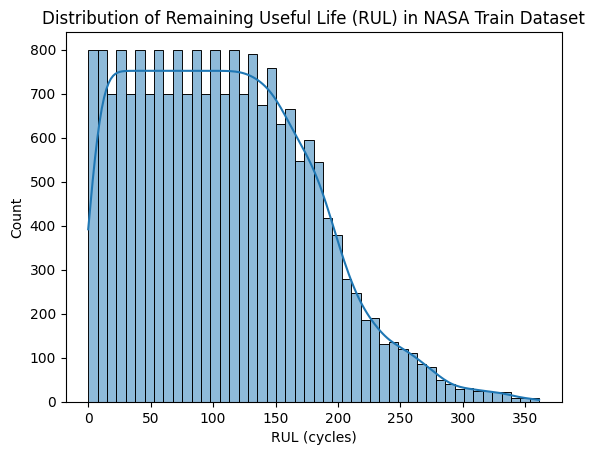

MetroPT Dataset Summary:
                TP2           TP3            H1   DV_pressure    Reservoirs  \
count  77266.000000  77266.000000  77266.000000  77266.000000  77266.000000   
mean       0.844056      8.975271      8.136514     -0.021907      1.545418   
std        2.681745      0.692682      2.710149      0.170963      0.051957   
min       -0.030000      2.794000     -0.034000     -0.036000      1.408000   
25%       -0.012000      8.472000      8.352000     -0.028000      1.536000   
50%       -0.010000      8.988000      8.880000     -0.028000      1.570000   
75%       -0.008000      9.506000      9.436000     -0.026000      1.578000   
max       10.752000     10.292000     10.282000      8.110000      1.642000   

       Oil_temperature     Flowmeter  Motor_current          COMP  \
count     77266.000000  77266.000000   77266.000000  77266.000000   
mean         62.335274     20.043372       1.837086      0.904460   
std           6.897494      3.538226       2.186753     

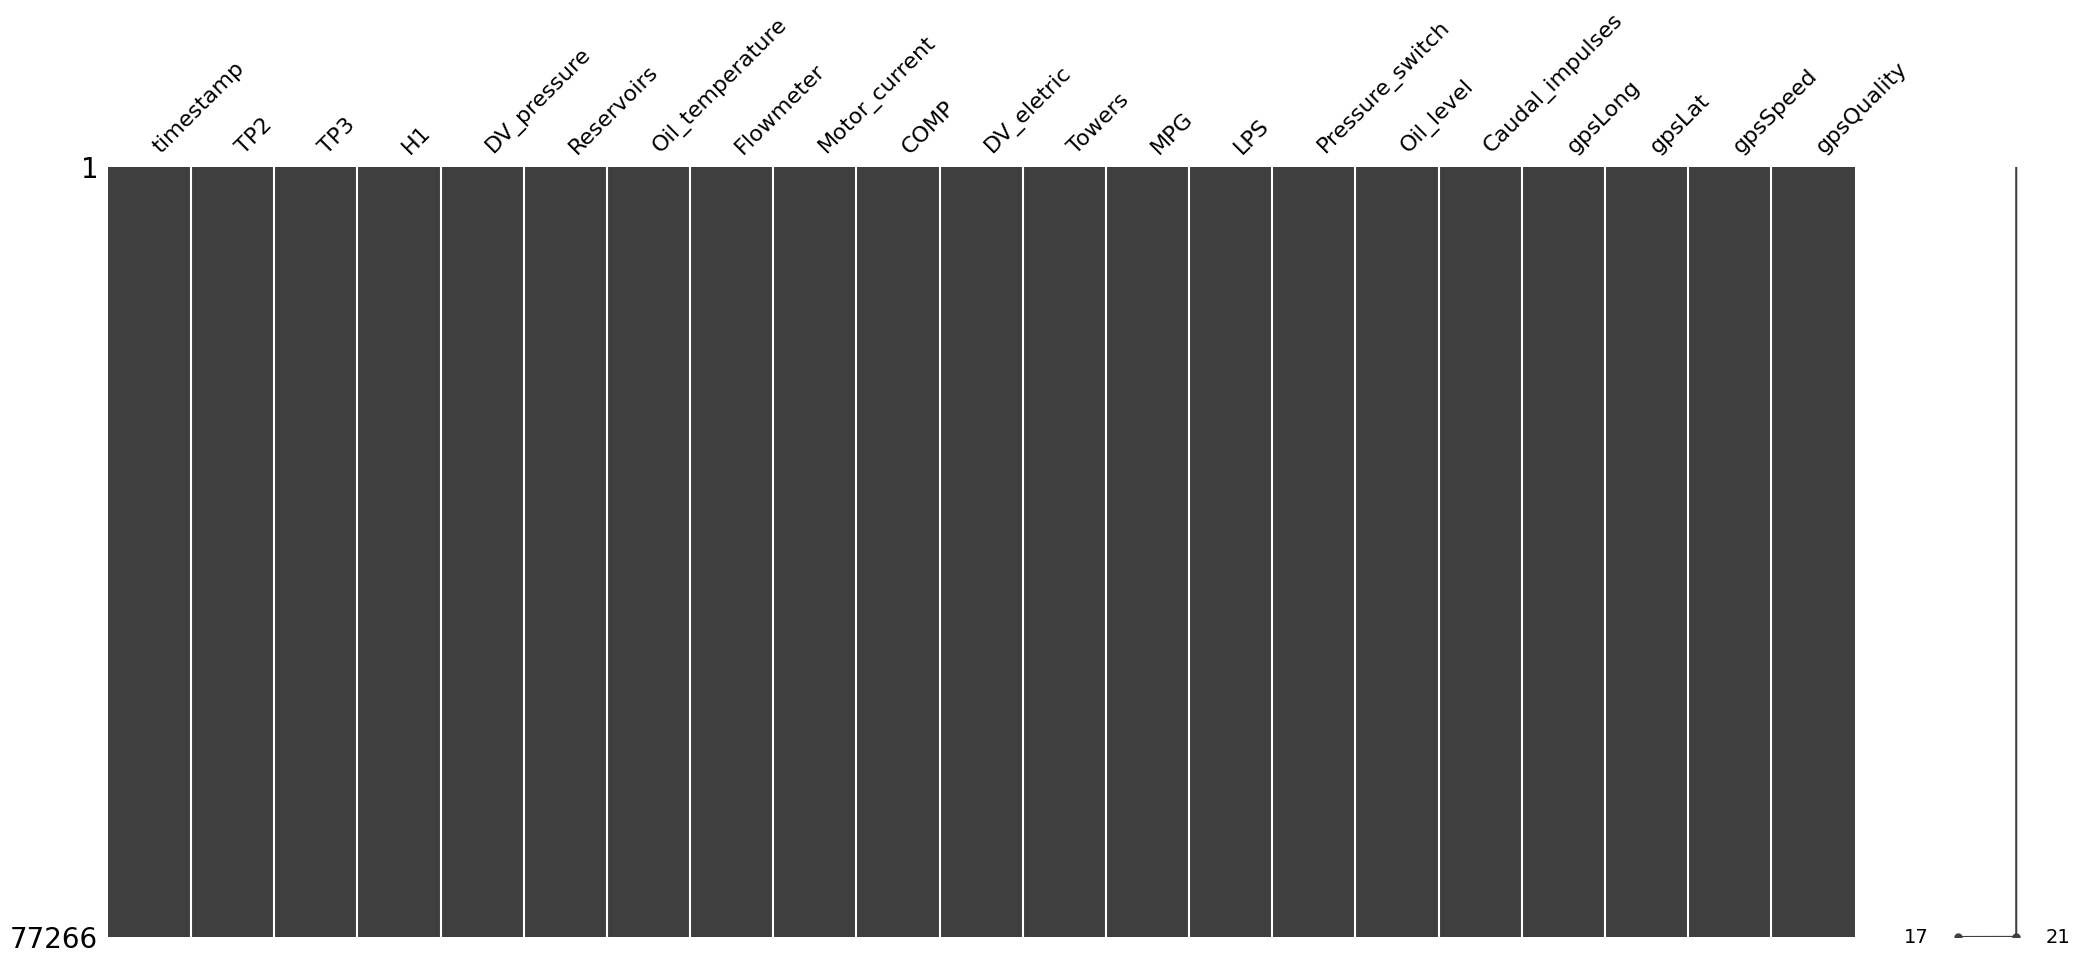

Distribution of a Sample Feature in MetroPT Dataset:


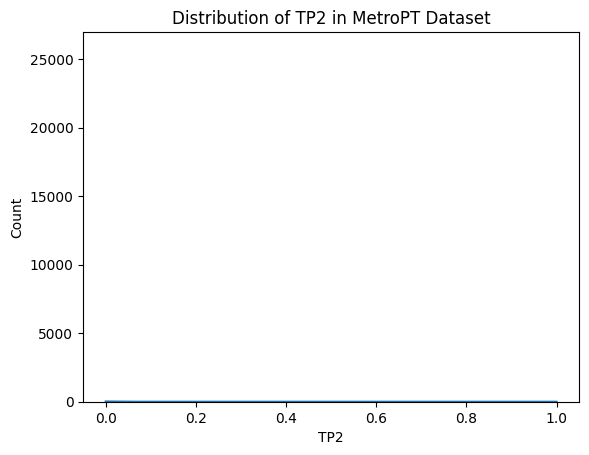

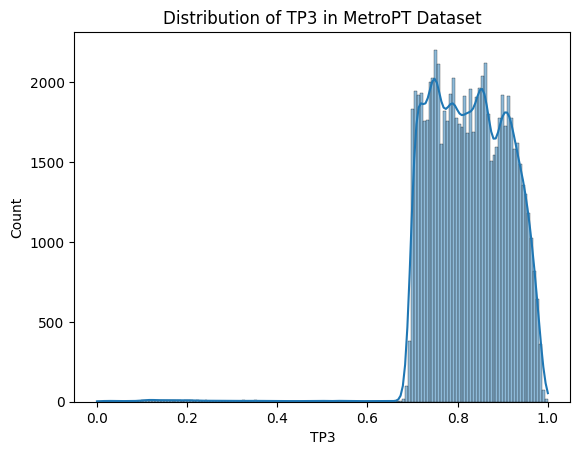

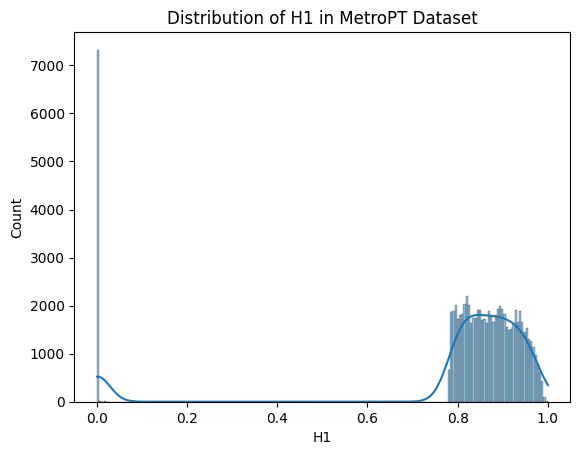

NASA Train Sample:
    unit_number  time_in_cycles  op_setting_1  op_setting_2  op_setting_3  \
0            1               1      0.459770      0.166667           0.0   
1            1               2      0.609195      0.250000           0.0   
2            1               3      0.252874      0.750000           0.0   
3            1               4      0.540230      0.500000           0.0   
4            1               5      0.390805      0.333333           0.0   

   sensor_measurement_1  sensor_measurement_2  sensor_measurement_3  \
0                   0.0              0.183735              0.406802   
1                   0.0              0.283133              0.453019   
2                   0.0              0.343373              0.369523   
3                   0.0              0.343373              0.256159   
4                   0.0              0.349398              0.257467   

   sensor_measurement_4  sensor_measurement_5  ...  sensor_measurement_13  \
0              0.30

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import missingno as msno

# Define paths to NASA datasets and MetroPT dataset
nasa_train_path = 'train_FD001.txt'  # Adjust path as per file location in Colab
nasa_test_path = 'test_FD001.txt'
nasa_rul_path = 'RUL_FD001.txt'
metropt_path = 'dataset_train.csv'

# Load NASA Train Dataset
df_nasa_train = pd.read_csv(nasa_train_path, delim_whitespace=True, header=None)
df_nasa_train.columns = [
    'unit_number', 'time_in_cycles', 'op_setting_1', 'op_setting_2', 'op_setting_3'
] + [f'sensor_measurement_{i}' for i in range(1, 22)]

# Load NASA Test Dataset and RUL Labels
df_nasa_test = pd.read_csv(nasa_test_path, delim_whitespace=True, header=None)
df_nasa_test.columns = df_nasa_train.columns

# Load RUL file
df_rul = pd.read_csv(nasa_rul_path, header=None, names=['RUL'])

# Load MetroPT Dataset
df_metropt = pd.read_csv(metropt_path)

# NASA EDA
print("NASA Train Dataset Summary:")
print(df_nasa_train.describe())

# Visualize Missing Data in NASA Train Dataset
print("Missing Data in NASA Train Dataset:")
msno.matrix(df_nasa_train)
plt.show()

# Normalize Operational Settings and Sensor Measurements in NASA Train
scaler = MinMaxScaler()
df_nasa_train[['op_setting_1', 'op_setting_2', 'op_setting_3']] = scaler.fit_transform(df_nasa_train[['op_setting_1', 'op_setting_2', 'op_setting_3']])
sensor_columns = [f'sensor_measurement_{i}' for i in range(1, 22)]
df_nasa_train[sensor_columns] = scaler.fit_transform(df_nasa_train[sensor_columns])

# Distribution of Operational Settings
print("Distribution of Operational Settings:")
for col in ['op_setting_1', 'op_setting_2', 'op_setting_3']:
    sns.histplot(df_nasa_train[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Time-Series Trends for Sensors in a Sample Unit
sample_unit = df_nasa_train[df_nasa_train['unit_number'] == 1]
plt.figure(figsize=(10, 6))
for sensor in ['sensor_measurement_2', 'sensor_measurement_3']:  # Adjust based on critical sensors
    plt.plot(sample_unit['time_in_cycles'], sample_unit[sensor], label=sensor)
plt.xlabel('Time in Cycles')
plt.ylabel('Sensor Measurement')
plt.title('Time-Series Trends for Sample Unit in NASA Dataset')
plt.legend()
plt.show()

# Remaining Useful Life (RUL) Feature for Training Set
# Calculate RUL by subtracting each unit's cycle count from its max cycle
df_nasa_train['RUL'] = df_nasa_train.groupby('unit_number')['time_in_cycles'].transform(lambda x: x.max() - x)

# Visualize Remaining Useful Life
sns.histplot(df_nasa_train['RUL'], kde=True)
plt.title('Distribution of Remaining Useful Life (RUL) in NASA Train Dataset')
plt.xlabel('RUL (cycles)')
plt.show()

# MetroPT Dataset EDA
print("MetroPT Dataset Summary:")
print(df_metropt.describe())

# Visualize Missing Data in MetroPT Dataset
print("Missing Data in MetroPT Dataset:")
msno.matrix(df_metropt)
plt.show()

# Normalize relevant features in MetroPT dataset if required
# Assuming there are numerical features to be scaled in MetroPT
numerical_columns_metropt = df_metropt.select_dtypes(include=[np.number]).columns
df_metropt[numerical_columns_metropt] = scaler.fit_transform(df_metropt[numerical_columns_metropt])

# Distribution Plot for a Sample Feature in MetroPT Dataset
print("Distribution of a Sample Feature in MetroPT Dataset:")
for col in numerical_columns_metropt[:3]:  # Adjust based on key features
    sns.histplot(df_metropt[col], kde=True)
    plt.title(f'Distribution of {col} in MetroPT Dataset')
    plt.show()

# Combine NASA RUL values from Test Set with Test Data
df_nasa_test = df_nasa_test.copy()
df_nasa_test['RUL'] = df_rul['RUL']

# Final Prepared Data Samples
print("NASA Train Sample:\n", df_nasa_train.head())
print("NASA Test Sample:\n", df_nasa_test.head())
print("MetroPT Dataset Sample:\n", df_metropt.head())
